In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)

# Fazendo analise dos dados brutos

In [150]:
movies = pd.read_csv('movie_metadata_0.csv', dtype='object')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131,NaN,Rob Walker,131,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12,7.1,NaN,0


In [11]:
import pandas_profiling
report = pandas_profiling.ProfileReport(movies)
report

Number of variables,29
Number of observations,4998
Total Missing (%),1.8%
Total size in memory,1.1 MiB
Average record size in memory,232.0 B
Numeric,16
Categorical,12
Boolean,0
Date,0
Text (Unique),0
Rejected,1


## Algumas analises que podem ser feitas
1. Existem 28 colunas
2. 5043 exemplos
3. 1.9% são de dados faltantes
4. 15 colunas contém dados numéricos
5. 12 são dados categoricos
6. Existem filmes de cerca de 65 países
7. Existem 45 dados duplicados
8. O ator que mais participou dos filmes é o Robert De Niro 
9. A maior parte dos filmes são coloridos
10. 3808  filmes foram feitos nos Estados Unidos
11. O lucro médio dos filmes é de 48468000
12. A nota média dos filmes é de 6.44
13. O orçamento médio dos filmes é de 39753000
14. A coluna `cast_total_facebook_likes` tem uma correlação muito alta com `actor_1_facebook_likes`

## Removendo dados duplicados

## Some conclusions we can observe:
the data is strongly biased by USA movies, about 3774 movies are from USA, if the goal is to preview the score of a movie made in United States, this dataset works fine, but wont work well for the second place, for instance, that only have about 443 movies.


### Pentaho Data Integration was used to map some columns such as:
- Director
- Actor 1, 2 and 3
- genres
- plot_keywords
- Language
- Country
- PG-rating


In [15]:
correlations = movies.corr()
correlations

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


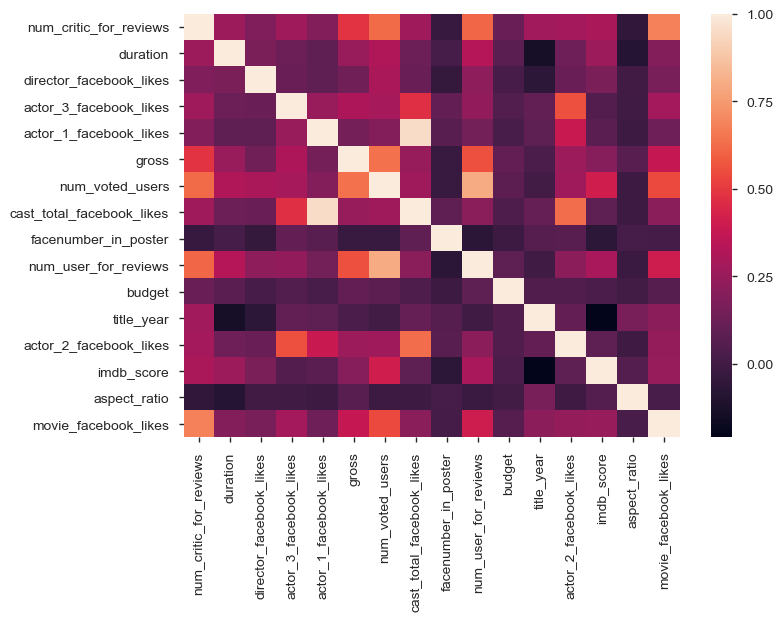

In [16]:
import numpy as np


mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlations)

separar os dados verificar se consegue prever bem tanto para filmes americanos e filmes não americanos

In [42]:
content_rating_score = movies.groupby('content_rating').aggregate({'imdb_score':[ np.mean]})
content_rating_score.head()

,imdb_score
,mean
content_rating,
Approved,7.325455
G,6.529464
GP,6.916667
M,6.840000
NC-17,6.542857


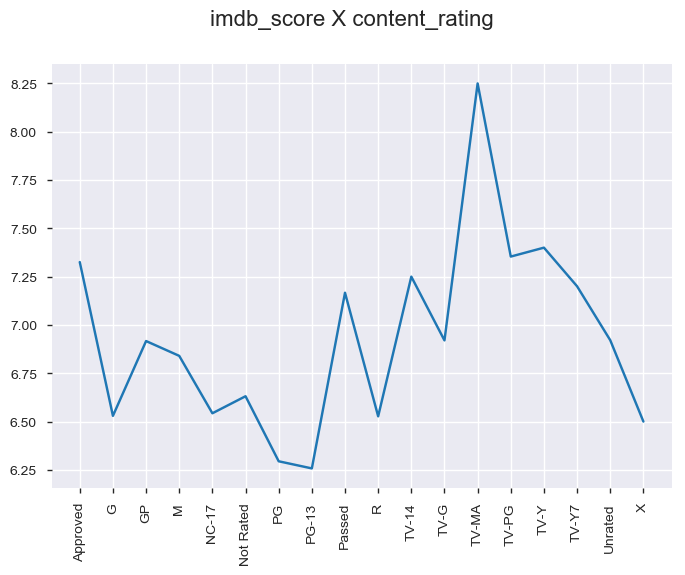

In [41]:
plt.plot(content_rating_score)
plt.xticks(rotation=90)
plt.suptitle('imdb_score X content_rating', fontsize=16)
plt.savefig('scoreXcontent.png')

In [45]:
country_score = movies.groupby('country').aggregate({'imdb_score':[ np.mean]})
country_score.head()

,imdb_score
,mean
country,
Afghanistan,7.400000
Argentina,7.500000
Aruba,4.800000
Australia,6.514545
Bahamas,4.400000


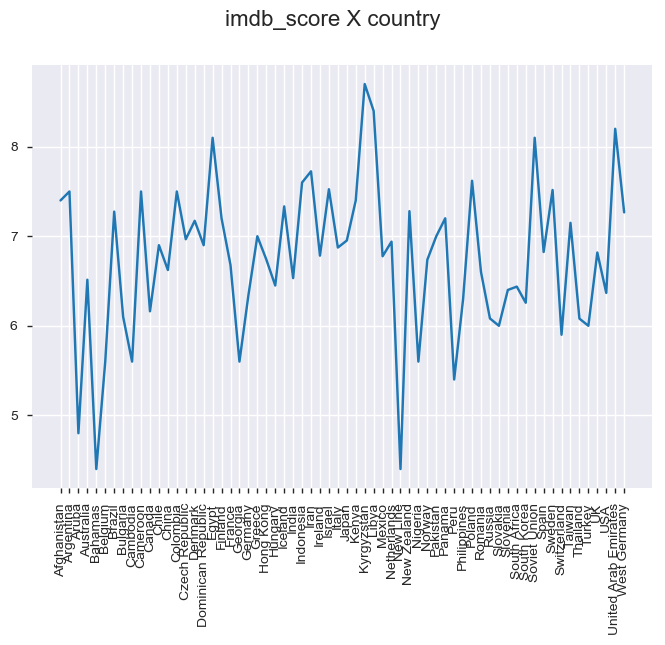

In [44]:
plt.plot(country_score)
plt.xticks(rotation=90)
plt.suptitle('imdb_score X country', fontsize=16)
plt.savefig('scoreXcountry.png')

In [53]:
year_budget = movies.groupby('title_year').aggregate({'budget':[ np.sum]})
year_budget.head()

,budget
,sum
title_year,
1916.0,385907.0
1920.0,100000.0
1925.0,245000.0
1927.0,6000000.0
1929.0,379000.0


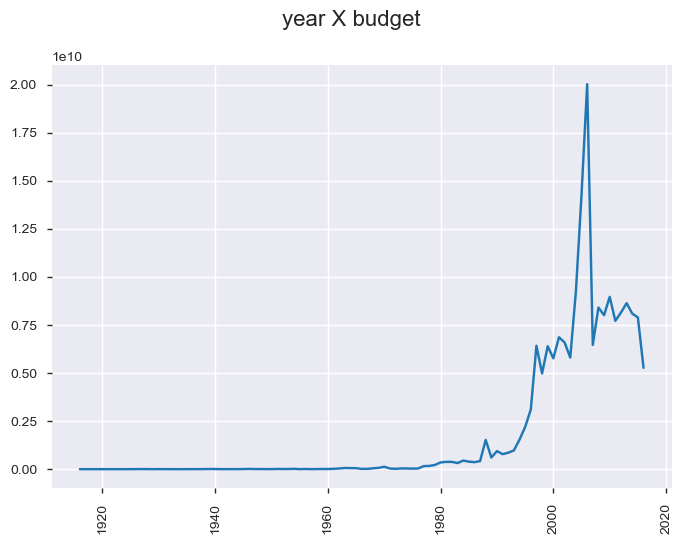

In [54]:
plt.plot(year_budget)
plt.xticks(rotation=90)
plt.suptitle('year X budget', fontsize=16)
plt.savefig('yearXbudget.png')

In [106]:
year_score = movies.groupby('title_year').aggregate({'imdb_score':[ np.mean]})
year_score.head()

,imdb_score
,mean
title_year,
1916.0,8.00
1920.0,4.80
1925.0,8.30
1927.0,8.30
1929.0,7.15


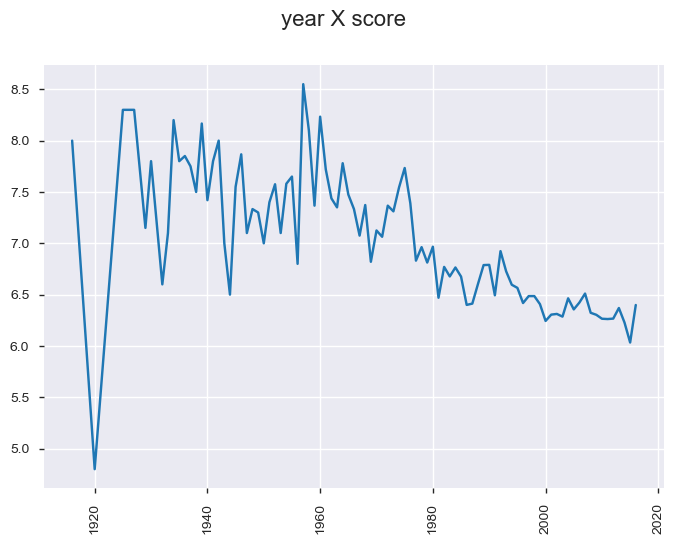

In [105]:
plt.plot(year_score)
plt.xticks(rotation=90)
plt.suptitle('year X score', fontsize=16)
plt.savefig('yearXscore.png')

In [78]:
new_movies.budget = transformed_budget_values
new_movies.duration = transformed_duration_values

In [143]:
top_directors = movies.director_name.value_counts()[:10]
last_directors = movies.director_name.value_counts()[-10::]

In [144]:
top_director_movies = movies[movies.director_name.isin(top_directors.index)]
last_director_movies = movies[movies.director_name.isin(last_directors.index)]


In [145]:
top_director_movies_agg = top_director_movies.groupby('director_name').aggregate({'imdb_score':[ np.mean]})
last_director_movies_agg = last_director_movies.groupby('director_name').aggregate({'imdb_score':[ np.mean]})

top_director_movies_agg.count()

imdb_score  mean    10
dtype: int64

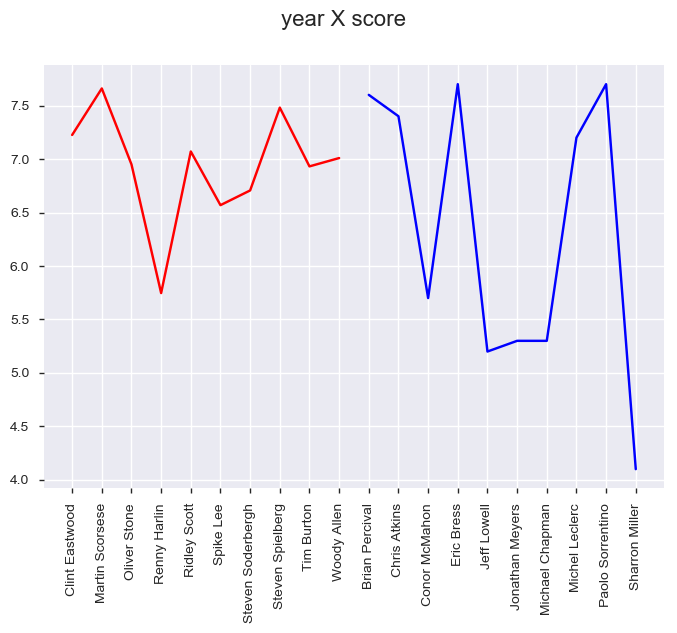

In [147]:
plt.plot(top_director_movies_agg, '-r')
plt.plot(last_director_movies_agg, '-b')
plt.xticks(rotation=90)
plt.suptitle('year X score', fontsize=16)
plt.savefig('diretores.png')

In [149]:
country_score = movies.groupby('country').aggregate({'imdb_score':[ np.mean]})
country_score.head()

,budget
,mean
title_year,
1916.0,385907.0
1920.0,100000.0
1925.0,245000.0
1927.0,6000000.0
1929.0,379000.0


In [ ]:
plt.plot(year_budget)